# Análisis de Reversibilidad

A continuación se realizará un análisis numérico para las mediciones realizadas durante la experimentación de ley de reversibilidad.

## Lectura de Datos

Importando las librerías de análisis:

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

Leyendo el archivo .csv de datos obtenidos en la experimentación:

In [2]:
df = pd.read_csv("experiment2_data.csv")
df.head()

,Refraccion,Incidencia
0,0.017452,0.000000
1,0.104528,0.156434
2,0.216440,0.300706
3,0.325568,0.469472
4,0.422618,0.601815


Tomando al seno de los ángulos de refracción como la variable independiente x y al seno de los ángulos de incidencia como la variable dependiente y(x):

In [3]:
x = df['Refraccion']
y = df['Incidencia']

Graficamos los datos obtenidos durante la experimentación:

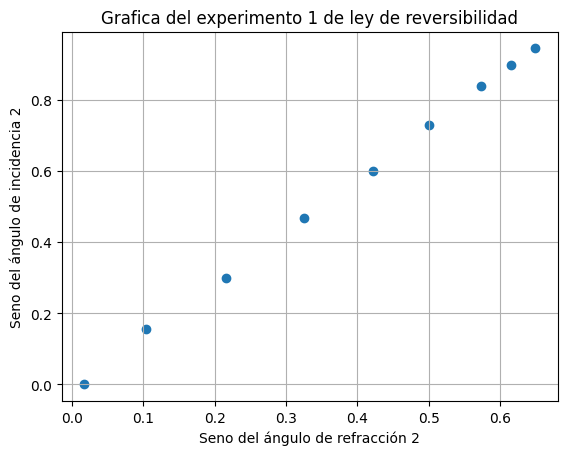

In [4]:
plt.scatter(x, y)
plt.xlabel('Seno del ángulo de refracción 2')
plt.ylabel('Seno del ángulo de incidencia 2')
plt.title('Grafica del experimento 1 de ley de reversibilidad')
plt.grid(True)
plt.show()

## Modelo de Regresión Lineal

Calculo de media o promedio de x y y:

In [5]:
x_mean = x.mean()
y_mean = y.mean()

Calculo de la suma de cuadrados para x y y:

In [6]:
x_sum = ((x - x_mean) ** 2).sum()
y_sum = ((y - y_mean) ** 2).sum()

Calculo de la suma de productos para x y y:

In [7]:
psum_xy = ((x - x_mean) * (y - y_mean)).sum()

Calculo de la pendiente m y la ordenada al origen b0:

In [8]:
m = psum_xy/x_sum
b0 = y_mean - (m * x_mean)

Siendo el modelo lineal y = mx + b0

In [9]:
print(f'y = {m}x + {b0}')

y = 1.484012465045503x + -0.015601506499994255


Calculando predicciones con el modelo de regresión lineal simple:

In [10]:
y_pred = b0 + m*x

Calculo de r²:

In [11]:
r2 = (psum_xy ** 2)/(x_sum * y_sum)
float(r2)

0.9993970043994387

Calculo de la desviación estandar para x y y:

In [12]:
std_x = np.std(x)
std_y = np.std(y)
print(f'Desviación estandar de x: {std_x:.4f}')
print(f'Desviación estandar de y: {std_y:.4f}')

Desviación estandar de x: 0.2157
Desviación estandar de y: 0.3202


Calculo de desviación estandar de los residuos:

In [13]:
residuos = y - y_pred
std_residuos = np.std(residuos)
float(std_residuos)

0.007863950014057413

## Graficando el modelo lineal

Haciendo uso del modelo de regresión lineal realizado, obtenemos la siguiente gráfica:

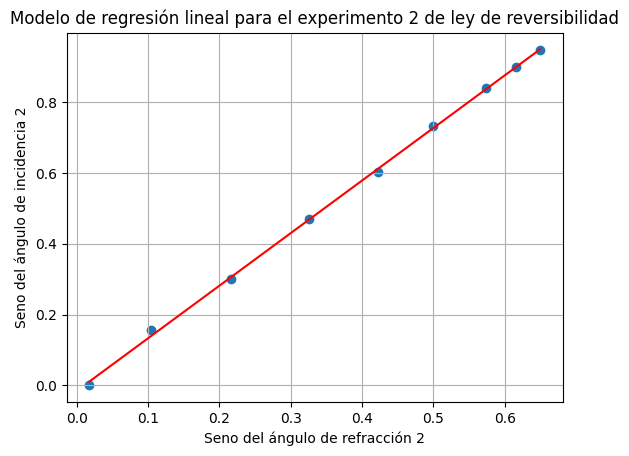

In [14]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Seno del ángulo de refracción 2')
plt.ylabel('Seno del ángulo de incidencia 2')
plt.title('Modelo de regresión lineal para el experimento 2 de ley de reversibilidad')
plt.grid(True)
plt.show()

## Propagación de Errores

Realizando el calculo de la propagación de errores en la pendiente m y la ordenada al origen b0, sabiendo que la incertidumbre para x y y es:

In [15]:
dx = dy = 0.5

In [16]:
n = len(x)
sigma_m = np.sqrt((dy**2 / x_sum) + (m**2 * dx**2 / x_sum))
sigma_b0 = np.sqrt((dy**2 / n) + (dx**2 * m**2 / x_sum) + (x_mean**2 * dy**2 / x_sum))
print(f'Incertidumbre en la pendiente (m): ±{sigma_m:.4f}')
print(f'Incertidumbre en la intersección (b0): ±{sigma_b0:.4f}')

Incertidumbre en la pendiente (m): ±1.3825
Incertidumbre en la intersección (b0): ±1.1953
